In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


<ipython-input-4-012ef0caf286>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Reason '].fillna('Not valid', inplace=True)


Accuracy: 1.0


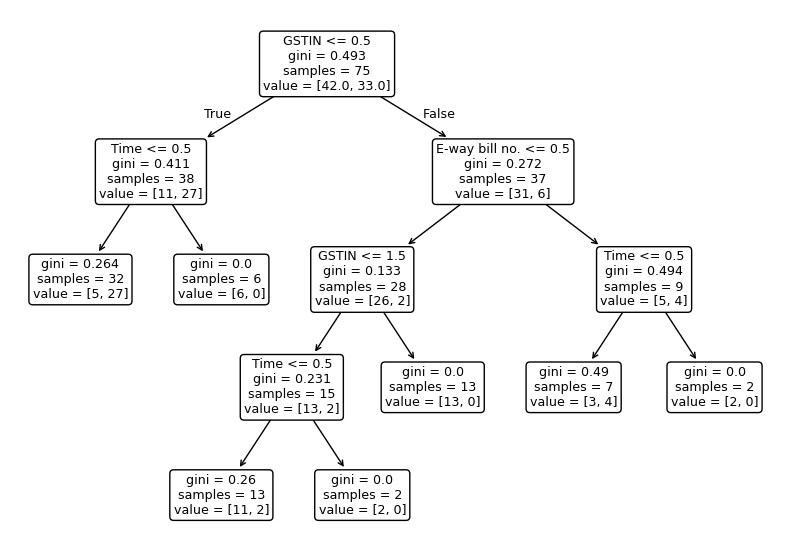

Accuracy: 1.0


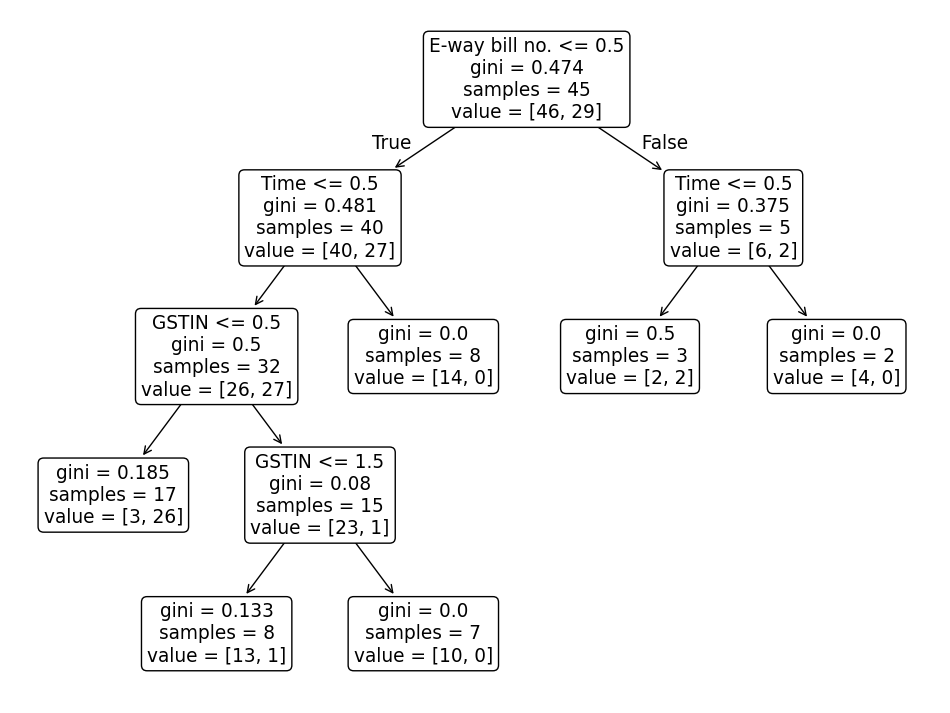

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8100f69ede22c911ea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import gradio as gr
import matplotlib.pyplot as plt




df=pd.read_csv('Training_data_da.csv')
d=df.drop(columns=['Label'])
column = d.columns
column_list = column.tolist()
# print(column_list)






df['Reason '].fillna('Not valid', inplace=True)
# df.head(5)
# print(df)

df = df.drop(columns=['GSTIN', 'E-way bill no.','Date','From', 'To','Vehicle number'])
# df.head(5)

if df['Tax value'].equals(df['GST returns']):
    df['Tax returns']=0
else:
    df['Tax returns']=1
df = df.drop(columns=['Tax value','GST returns'])
# df.head(5)

df['Tax returns'] = df['Tax returns'].where(df['Tax returns'] == 0, 1)
# df.head(20)

df['New Time'] = np.where(df['Time'] == df['RFID report time'], 0, 1)
df = df.drop(columns=['Time','RFID report time'])
# df.head(20)
# print(df)

le_rfid = LabelEncoder()
le_reason = LabelEncoder()

df['RFID report movement']=le_rfid.fit_transform(df['RFID report movement'])
df['Reason ']=le_rfid.fit_transform(df['Reason '])

features=df.drop('Label',axis='columns') #features
label=df['Label'] #labels





X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=42)




#Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(clf, rounded=True, feature_names=column)
plt.show()


#Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pre = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pre)
print("Accuracy:", accuracy)


plt.figure(figsize=(12, 9))  # Adjust figure size as needed
plot_tree(rf_classifier.estimators_[0], rounded=True, feature_names=column)
# Selects the first tree (estimators_[0]) for visualization
plt.show()



def predict_fraud(GSTIN, Eway_bill_no, Date, From, To, Vehicle_number, RFID_report_movement, Reason, Tax_value, GST_returns, Time, RFID_report_time):
  data = {
        'GSTIN': GSTIN,
        'E-way bill no.': Eway_bill_no,
        'Date': Date,
        'From': From,
        'To': To,
        'Vehicle number': Vehicle_number,
        'RFID report movement, Enter "No movement" or "Correct movement" or "Vehicle movement differs from the movement shown in e-way bill" ': RFID_report_movement,
        'Reason for difference in movement, Enter "valid" or "Not vaild" ': Reason,
        'Tax value': Tax_value,
        'GST returns': GST_returns,
        'Time': Time,
        'RFID report time': RFID_report_time
    }
  df1 = pd.DataFrame([data], columns=column_list)
  df1 = df1.drop(columns=['GSTIN', 'E-way bill no.','Date','From', 'To','Vehicle number'])

  # df1['Tax returns']=df1['Tax value'] - df1['GST returns']
  if df1['Tax value'].equals(df1['GST returns']):
    df1['Tax returns']=0
  else:
    df1['Tax returns']=1
  df1 = df1.drop(columns=['Tax value','GST returns'])

  # df1['Tax returns'] = df1['Tax returns'].where(df1['Tax returns'] == 0, 1)

  df1['New Time'] = np.where(df1['Time'] == df1['RFID report time'], 0, 1)
  df1 = df1.drop(columns=['Time','RFID report time'])

  # le_rfid = LabelEncoder()
  # le_reason = LabelEncoder()

  df1['RFID report movement']=le_rfid.fit_transform(df1['RFID report movement'])
  df1['Reason ']=le_rfid.fit_transform(df1['Reason '])


  y_predict = clf.predict(df1)
  if y_predict=='Yes':
    txt="No, the person is not a fraud"
  else:
    txt="Yes, he is a fraud"

  return txt

# def chatbot_response(user_input):
#   return f"You said: {user_input}"  # Example response










iface = gr.Interface(fn=predict_fraud,
                     inputs=["text", "text", "text", "text", "text", "text", "text", "text", "text", "text", "text", "text"],
                     outputs="text",
                     examples=[['27SWPVHLGCDY2UU', '261305072927', '2024-04-09', 'Location1', 'Location2', 'MH02ER2736', 'Vehicle movement differs from the movement shown in e-way bill', 'valid', '1000', '800', '12:00', '12:30']])
iface.launch(debug=True)